# Module 5 - Convolutional Neural Networks

#### Tasks to be Done:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras import utils, layers, models, losses
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam

In [2]:
data = fashion_mnist.load_data()
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(X_train, Y_train), (X_test, Y_test) = data

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_test[0].shape

(28, 28)

In [8]:
X_train = X_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((10000, 28, 28, 1)).astype('float32') / 255
Y_train = utils.np_utils.to_categorical(Y_train)
Y_test = utils.np_utils.to_categorical(Y_test)

In [12]:
model=Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=5, strides=1, activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D(pool_size=2, strides=2))
model.add(layers.Conv2D(filters=48, kernel_size=5, strides=1, activation='relu', input_shape=(14,14,32)))
model.add(layers.MaxPool2D(pool_size=2, strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))
adam = Adam(learning_rate=5e-4)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 48)          38448     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 48)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 768)               0         
                                                                 
 dense_6 (Dense)             (None, 256)              

In [13]:
model.fit(X_train, Y_train, epochs= 12, batch_size = 10, validation_data=(X_test,Y_test))

Epoch 1/12
60/60 [==============================] - 55s 890ms/step - loss: 1.1369 - accuracy: 0.6315 - val_loss: 0.6846 - val_accuracy: 0.7397
Epoch 2/12
60/60 [==============================] - 53s 884ms/step - loss: 0.6123 - accuracy: 0.7666 - val_loss: 0.5790 - val_accuracy: 0.7816
Epoch 3/12
60/60 [==============================] - 59s 983ms/step - loss: 0.5196 - accuracy: 0.8079 - val_loss: 0.5074 - val_accuracy: 0.8148
Epoch 4/12
60/60 [==============================] - 53s 884ms/step - loss: 0.4621 - accuracy: 0.8323 - val_loss: 0.4553 - val_accuracy: 0.8372
Epoch 5/12
60/60 [==============================] - 52s 876ms/step - loss: 0.4239 - accuracy: 0.8485 - val_loss: 0.4355 - val_accuracy: 0.8441
Epoch 6/12
60/60 [==============================] - 52s 875ms/step - loss: 0.3933 - accuracy: 0.8608 - val_loss: 0.4202 - val_accuracy: 0.8516
Epoch 7/12
60/60 [==============================] - 53s 883ms/step - loss: 0.3776 - accuracy: 0.8658 - val_loss: 0.3834 - val_accuracy: 0.8655

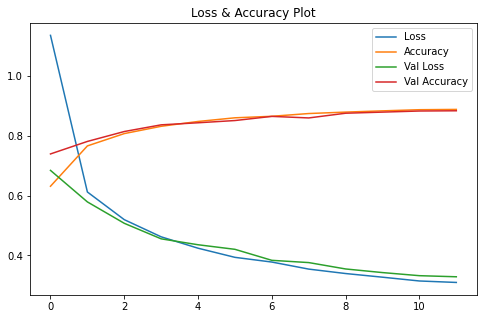

In [14]:
plt.figure(figsize=(8,5))
plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['accuracy'], label='Accuracy')
plt.plot(model.history.history['val_loss'], label='Val Loss')
plt.plot(model.history.history['val_accuracy'], label='Val Accuracy')
plt.title('Loss & Accuracy Plot')
plt.legend()
plt.show()

In [15]:
scores = model.evaluate(X_test, Y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.3283 - accuracy: 0.8843


In [16]:
print('Loss:', scores[0]*100)
print('Accuracy:', scores[1]*100)

Loss: 32.825684547424316
Accuracy: 88.42999935150146
